
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Oct 14, 2019)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

0.5182
We are 95% confident that Ed Orgeron will win the poll with point estimate of 0.5182 and a margin of error of 0.010404999999999998


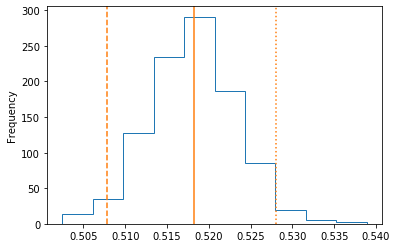

In [6]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

largepoll = pd.read_csv('D:/LSU/1st Semester/Statistics and Data Visualization in Petroleum Engineering (PETE 2061)/Assignments and Lab Jupyter Notebooks/Assignment 8/poll-larger.csv')
largepoll['vote'].value_counts(normalize=True)

def sample1(OrgeronWinPercent,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < OrgeronWinPercent,'Orgeron','Saban')})

def samplingdist1(OrgeronWinPercent,n=1000):
    return pd.DataFrame([sample1(OrgeronWinPercent,n)['vote'].value_counts(normalize=True) for i in range(1000)])

def quantiles1(OrgeronWinPercent,n=1000):
    distDF = samplingdist1(OrgeronWinPercent,n)
    return distDF['Orgeron'].quantile(0.025), distDF['Orgeron'].quantile(0.975)

distDF1 = samplingdist1(0.5181,10000)
distDF1['Orgeron'].plot(kind='hist', histtype='step')
plt.axvline(distDF1['Orgeron'].quantile(0.025), c='C1',linestyle='--')
plt.axvline(distDF1['Orgeron'].quantile(0.500), c='C1')
plt.axvline(distDF1['Orgeron'].quantile(0.975), c='C1',linestyle=':')
x = distDF1['Orgeron'].quantile(0.5)
y = distDF1['Orgeron'].quantile(0.5) - distDF1['Orgeron'].quantile(0.025)
quantiles1(0.5181,10000)
print(x)
print(f'We are 95% confident that Ed Orgeron will win the poll with point estimate of {x} and a margin of error of {y}')